ABOUT DATASET
This dataset is originally from the National Institute of Diabetes and Digestiv 
and Kidney Diseases. The objective of the dataset is to diagnostically predi t
whether a patient has diabetes based on certain diagnostic measureme ts
included in the dataset. Several constraints were placed on the selectio  of
these instances from a larger database. In particular, all patients her  are
females at least 21 years old of Pima Indiaheri

 
tage.
COLUMN DESCRIPTION FOR DIABETES DATA:
• Pregnancies
• Glucose
• Blood Pressure
• Skin Thickness
• Insulin
• BM@I
• Diabetes
 Age
• Outcome

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier  # or another classifier of your choice
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
# loading dataset

import pandas as pd

# Replace this path with the actual path to your dataset
file_path = r'C:\Users\KARTHIK\OneDrive\Desktop\meriskill intern\projects\project 2\diabetes.csv'

# Read the dataset into a pandas DataFrame
diabetes_df = pd.read_csv(r"E:\\Education_All_Data Files\\EDU_DOCUMENTS\\ONLINE COURSES\\meriskill intern\\projects\\project 2\\diabetes.csv")

# Display the first few rows of the DataFrame to check if the import was successful
diabetes_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: >

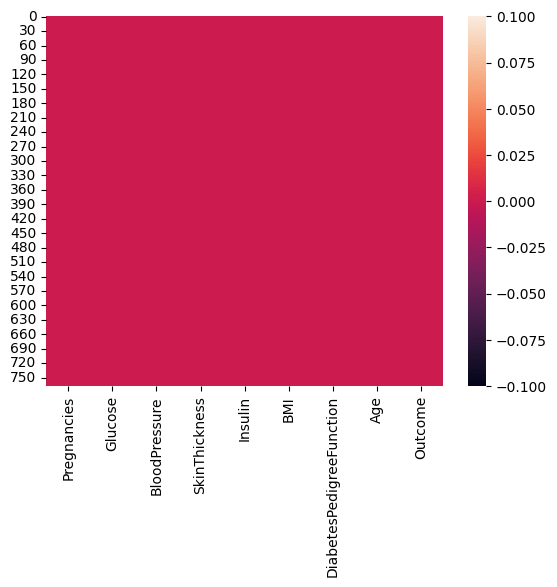

In [7]:
sns.heatmap(diabetes_df.isnull())

In [8]:
# Assuming 'diabetes_df' is your DataFrame containing the dataset
correlation_matrix = diabetes_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

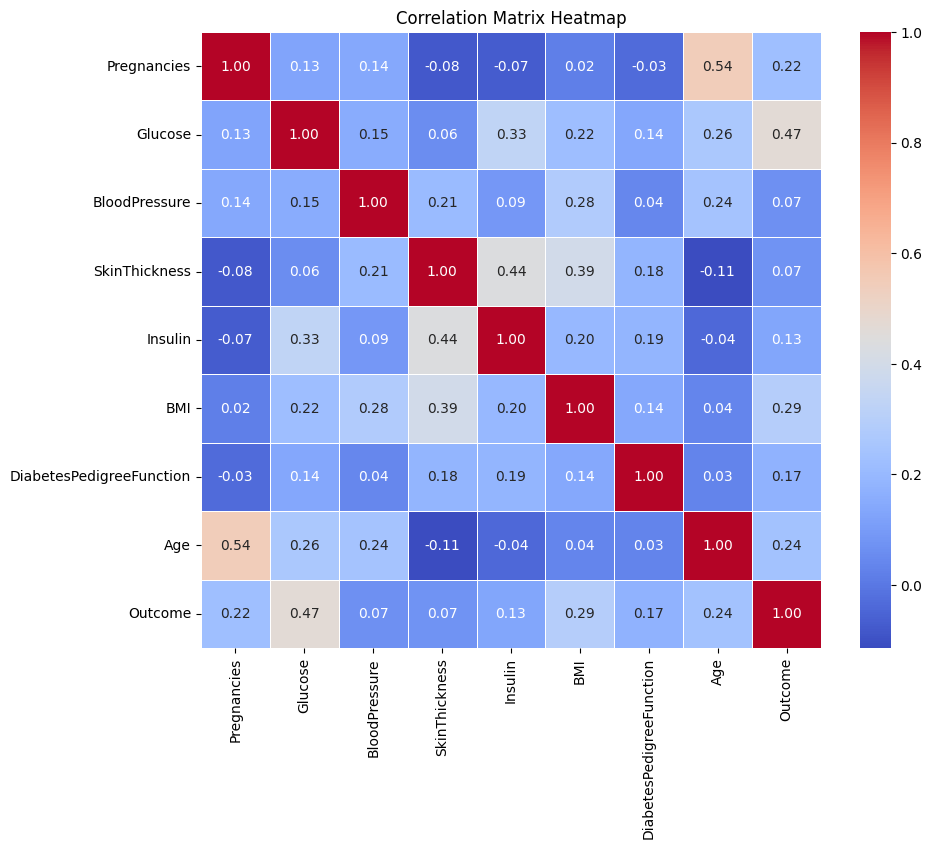

In [9]:
# Assuming 'diabetes_df' is your DataFrame containing the dataset
correlation_matrix = diabetes_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set the title of the plot
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()


In [3]:
# Display the first few rows of the dataset
print(diabetes_df.head())

# Check for missing values
print(diabetes_df.isnull().sum())

# Statistical summary of the dataset
print(diabetes_df.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
       Pregnancies  

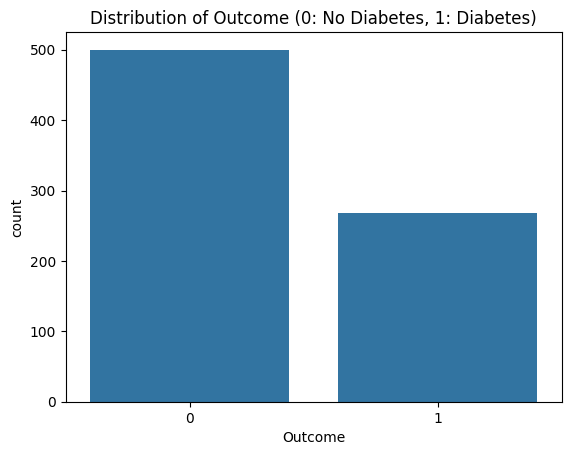

In [8]:
# Visualize the distribution of the target variable
sns.countplot(x='Outcome', data=diabetes_df)
plt.title('Distribution of Outcome (0: No Diabetes, 1: Diabetes)')
plt.show()

In [13]:
# Prepare the data for training
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
# Train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Make predictions on the test set
predictions = model.predict(X_test_scaled)

In [17]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.72


In [18]:
# Additional evaluation metrics
print('\nClassification Report:')
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [19]:
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, predictions))


Confusion Matrix:
[[77 22]
 [21 34]]


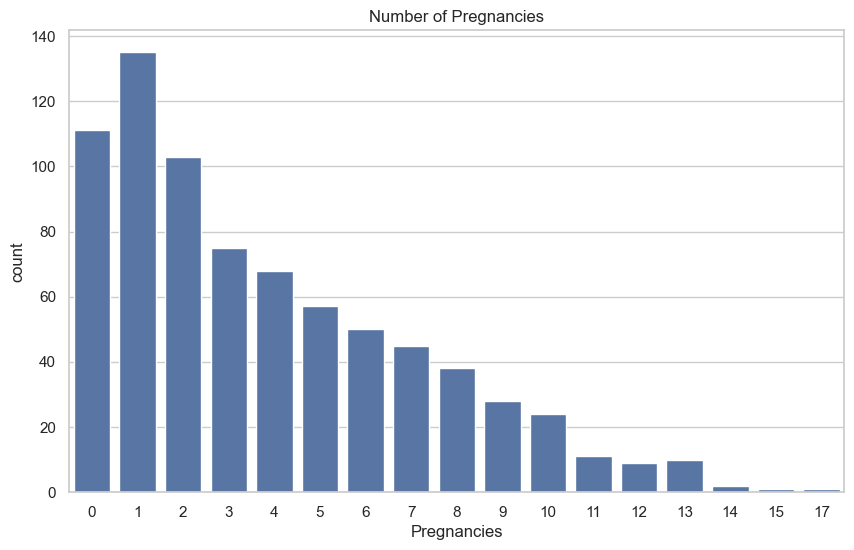

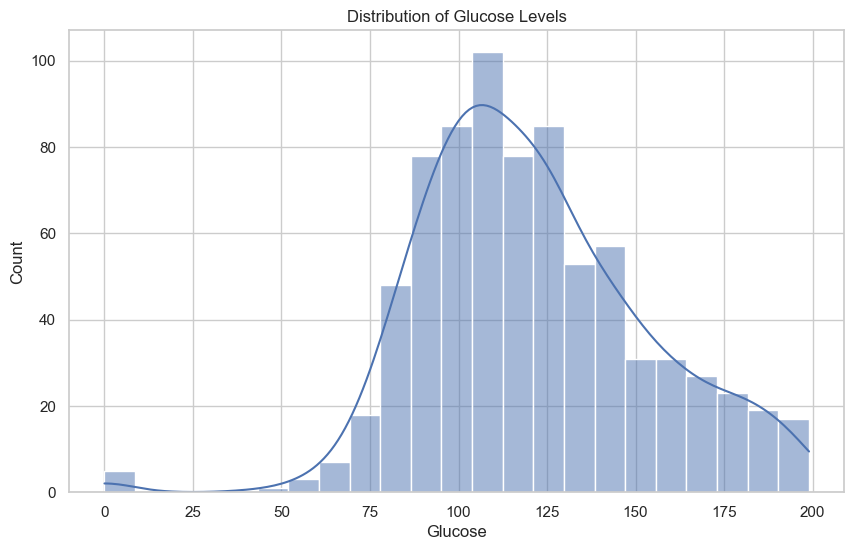

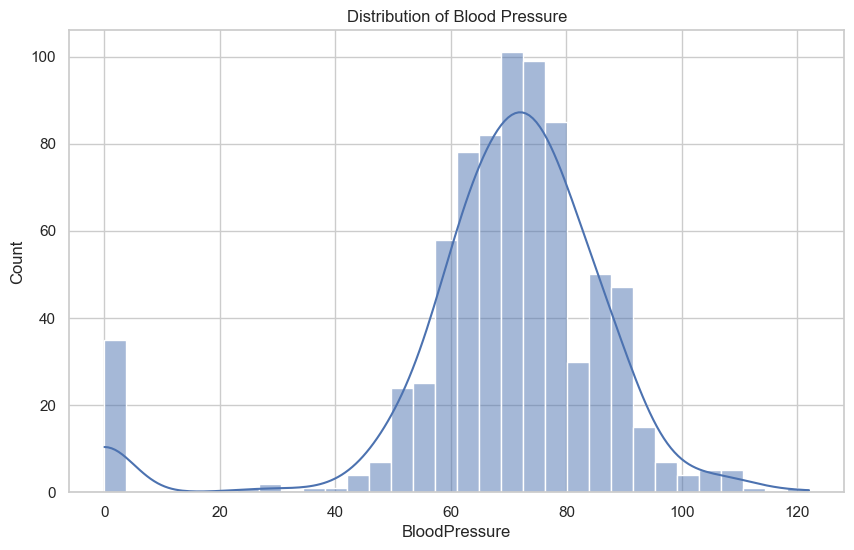

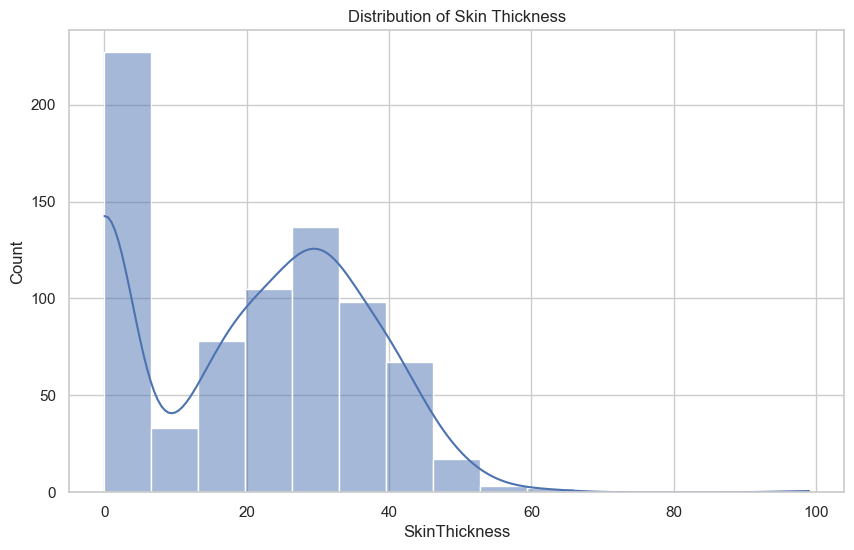

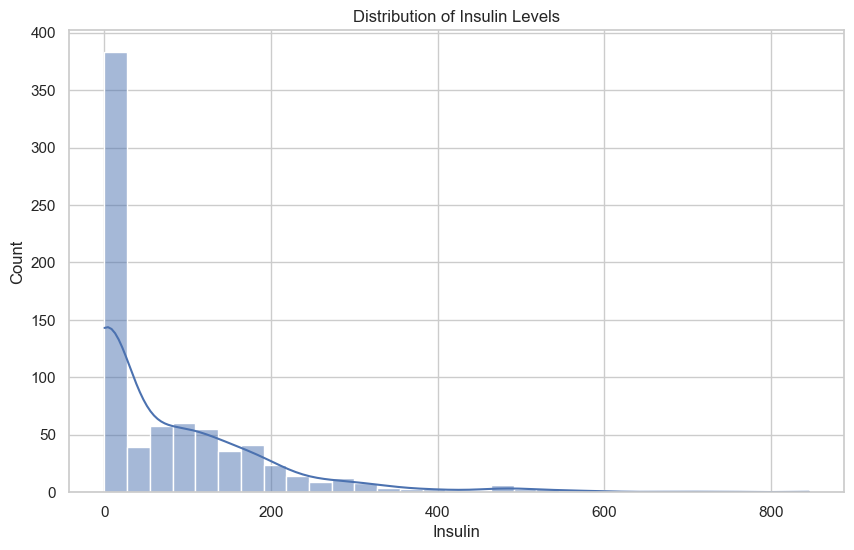

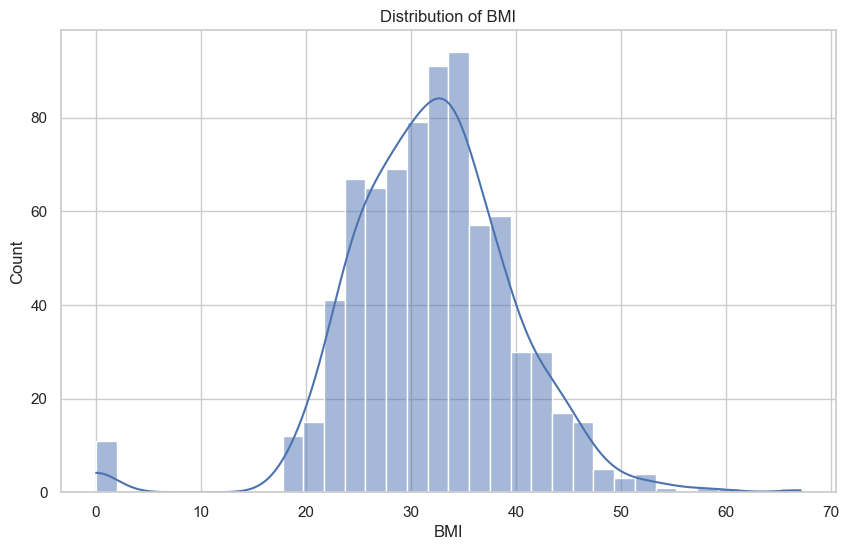

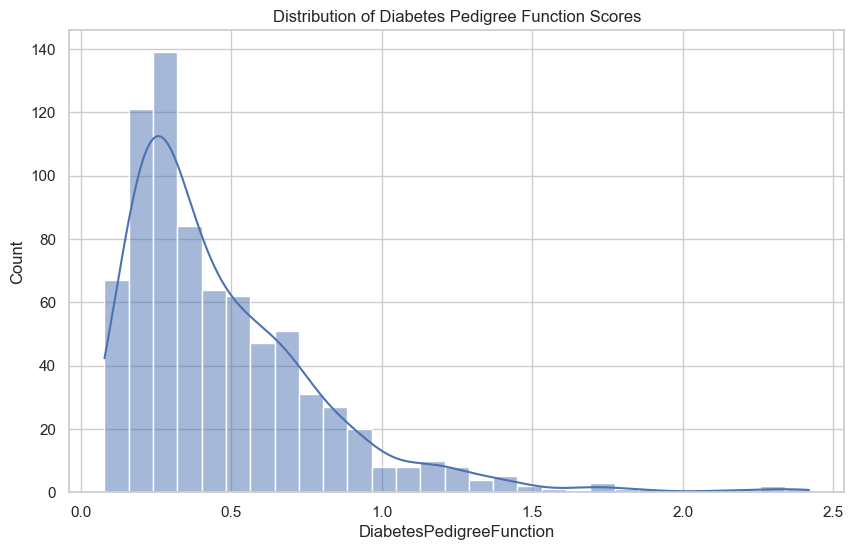

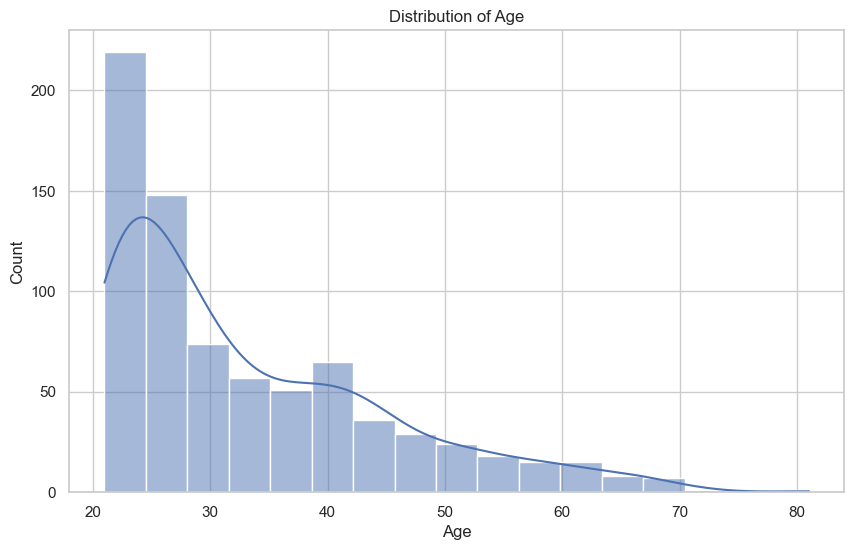

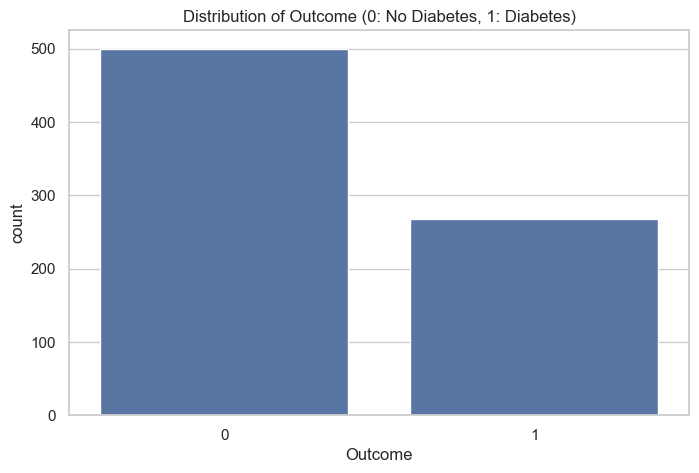

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Assuming 'diabetes_df' is your DataFrame containing the dataset

# 1. Pregnancies
plt.figure(figsize=(10, 6))
sns.countplot(x='Pregnancies', data=diabetes_df)
plt.title('Number of Pregnancies')
plt.show()

# 2. Glucose
plt.figure(figsize=(10, 6))
sns.histplot(x='Glucose', data=diabetes_df, kde=True)
plt.title('Distribution of Glucose Levels')
plt.show()

# 3. Blood Pressure
plt.figure(figsize=(10, 6))
sns.histplot(x='BloodPressure', data=diabetes_df, kde=True)
plt.title('Distribution of Blood Pressure')
plt.show()

# 4. Skin Thickness
plt.figure(figsize=(10, 6))
sns.histplot(x='SkinThickness', data=diabetes_df, kde=True)
plt.title('Distribution of Skin Thickness')
plt.show()

# 5. Insulin
plt.figure(figsize=(10, 6))
sns.histplot(x='Insulin', data=diabetes_df, kde=True)
plt.title('Distribution of Insulin Levels')
plt.show()

# 6. BMI
plt.figure(figsize=(10, 6))
sns.histplot(x='BMI', data=diabetes_df, kde=True)
plt.title('Distribution of BMI')
plt.show()

# 7. Diabetes Pedigree Function
plt.figure(figsize=(10, 6))
sns.histplot(x='DiabetesPedigreeFunction', data=diabetes_df, kde=True)
plt.title('Distribution of Diabetes Pedigree Function Scores')
plt.show()

# 8. Age
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', data=diabetes_df, kde=True)
plt.title('Distribution of Age')
plt.show()

# 9. Outcome
plt.figure(figsize=(8, 5))
sns.countplot(x='Outcome', data=diabetes_df)
plt.title('Distribution of Outcome (0: No Diabetes, 1: Diabetes)')
plt.show()


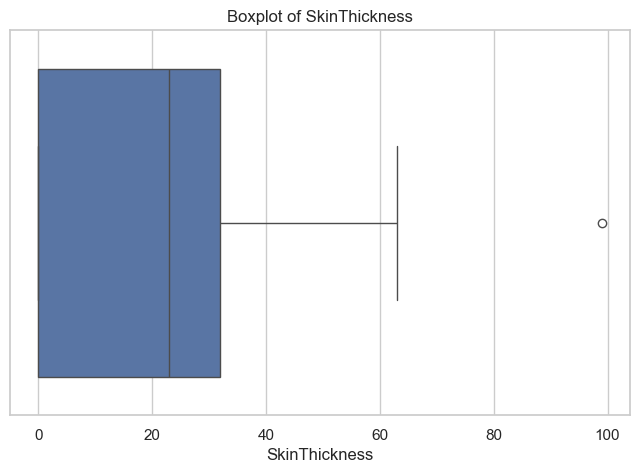

In [21]:
# Visualize the distribution of 'SkinThickness'
plt.figure(figsize=(8, 5))
sns.boxplot(x='SkinThickness', data=diabetes_df)
plt.title('Boxplot of SkinThickness')
plt.show()

In [23]:
# Checking for outliers in 'SkinThickness'
Q1_skin_thickness = diabetes_df['SkinThickness'].quantile(0.25)
Q3_skin_thickness = diabetes_df['SkinThickness'].quantile(0.75)
IQR_skin_thickness = Q3_skin_thickness - Q1_skin_thickness
lower_bound_skin_thickness = Q1_skin_thickness - 1.5 * IQR_skin_thickness
upper_bound_skin_thickness = Q3_skin_thickness + 1.5 * IQR_skin_thickness
outliers_skin_thickness = diabetes_df[(diabetes_df['SkinThickness'] < lower_bound_skin_thickness) | (diabetes_df['SkinThickness'] > upper_bound_skin_thickness)]

print(f'Number of outliers in SkinThickness: {len(outliers_skin_thickness)}')

Number of outliers in SkinThickness: 1


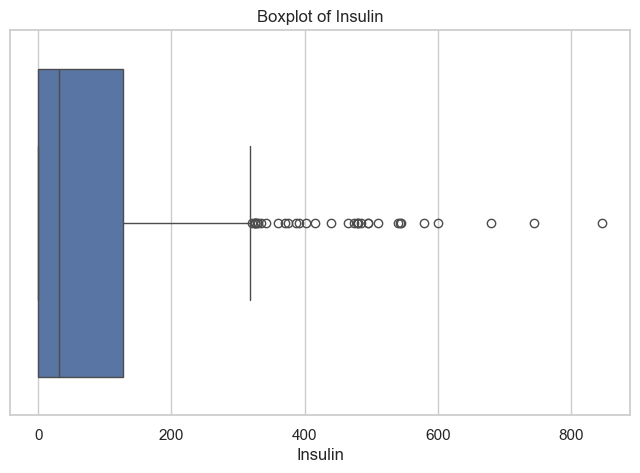

In [25]:
# Visualize the distribution of 'Insulin'
plt.figure(figsize=(8, 5))
sns.boxplot(x='Insulin', data=diabetes_df)
plt.title('Boxplot of Insulin')
plt.show()

In [27]:
# Checking for outliers in 'Insulin'
Q1_insulin = diabetes_df['Insulin'].quantile(0.25)
Q3_insulin = diabetes_df['Insulin'].quantile(0.75)
IQR_insulin = Q3_insulin - Q1_insulin
lower_bound_insulin = Q1_insulin - 1.5 * IQR_insulin
upper_bound_insulin = Q3_insulin + 1.5 * IQR_insulin
outliers_insulin = diabetes_df[(diabetes_df['Insulin'] < lower_bound_insulin) | (diabetes_df['Insulin'] > upper_bound_insulin)]

print(f'Number of outliers in Insulin: {len(outliers_insulin)}')

Number of outliers in Insulin: 34


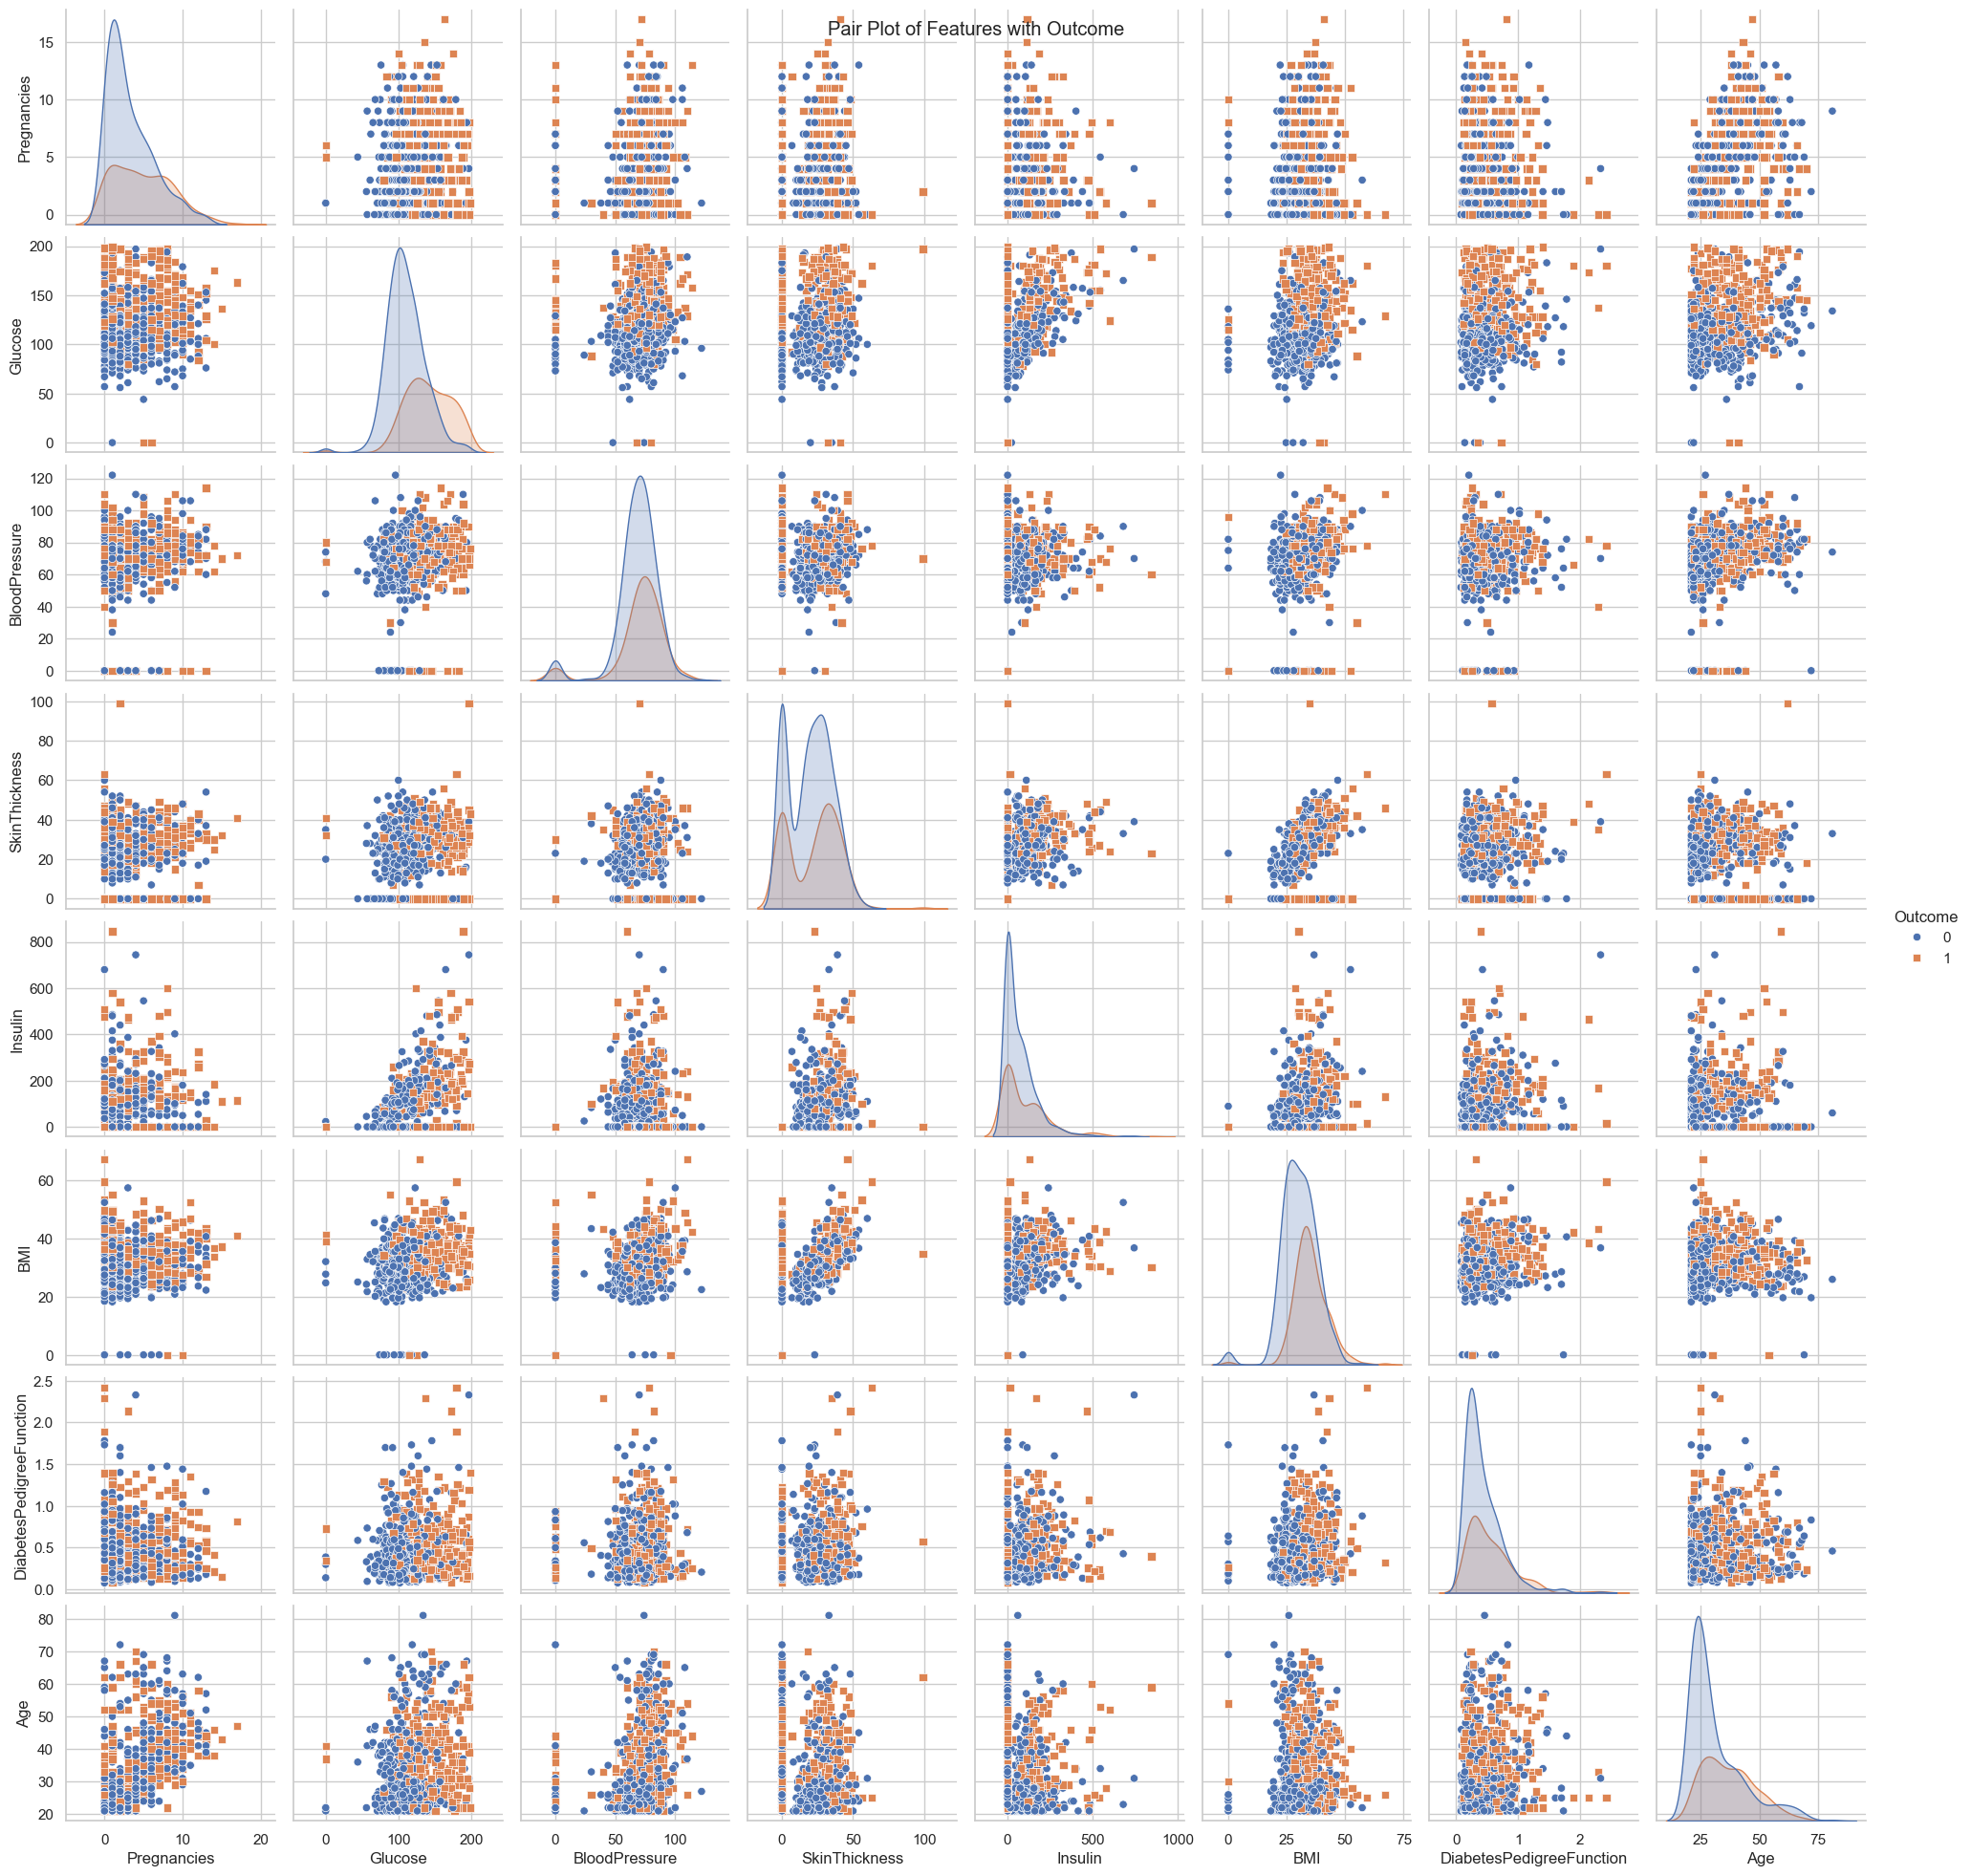

In [29]:
# Visualize relationships between features with a pair plot
sns.pairplot(diabetes_df, hue='Outcome', diag_kind='kde', markers=["o", "s"])
plt.suptitle('Pair Plot of Features with Outcome')
plt.show()

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [38]:
# Initialize and evaluate different models
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()
xgboost_model = XGBClassifier(random_state=42)
adaboost_model = AdaBoostClassifier(random_state=42)

models = [decision_tree_model, random_forest_model, knn_model, xgboost_model, adaboost_model]

for model in models:
    train_evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

Model: DecisionTreeClassifier
Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


Confusion Matrix:
[[75 24]
 [15 40]]
--------------------------------------------------
Model: RandomForestClassifier
Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154


Confusion Matrix:
[[77 22]
 [21 34]]
--------------------------------------------------
Model: KNeighborsClassifier
Ac

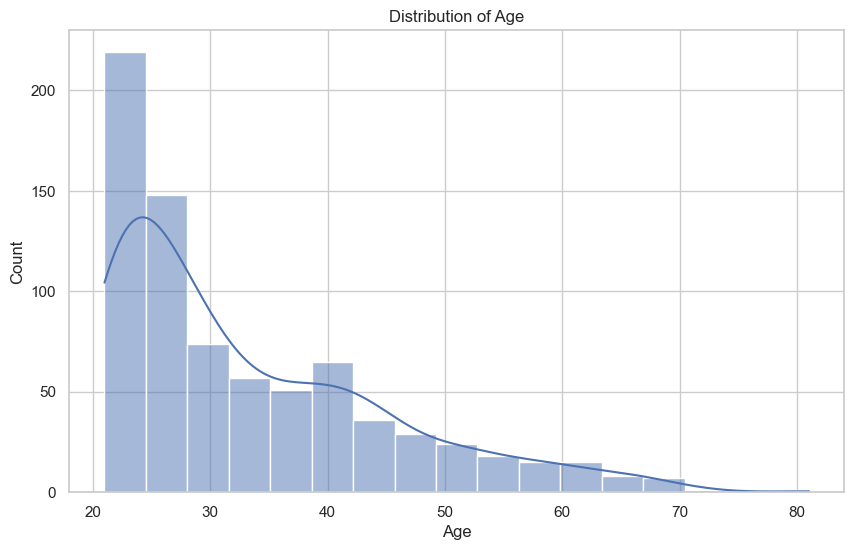

In [39]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', data=diabetes_df, kde=True)
plt.title('Distribution of Age')
plt.show()

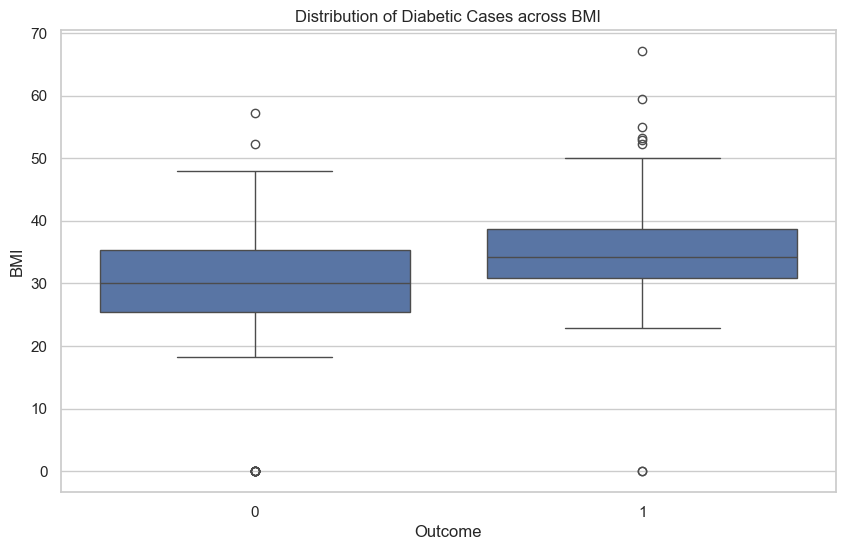

In [40]:
# Distribution of Diabetic Cases across BMI
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='BMI', data=diabetes_df)
plt.title('Distribution of Diabetic Cases across BMI')
plt.show()

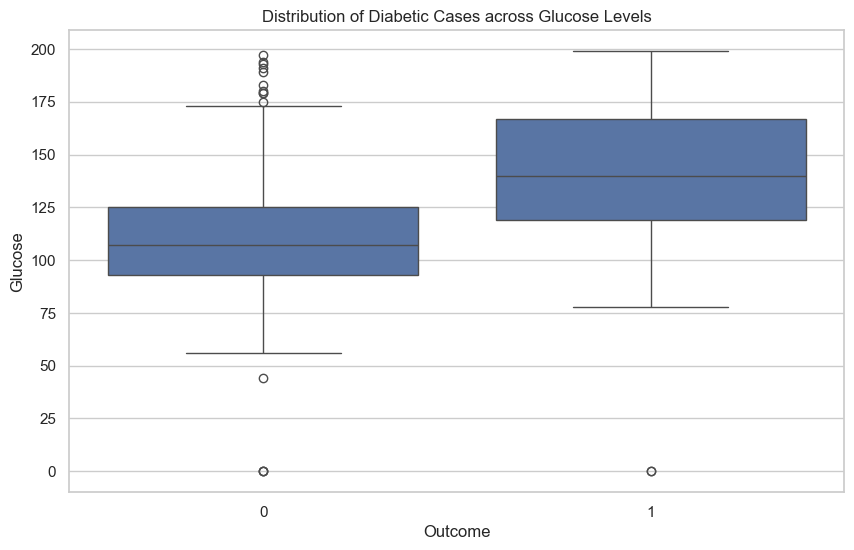

In [41]:
# Distribution of Diabetic Cases across Glucose Levels
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Glucose', data=diabetes_df)
plt.title('Distribution of Diabetic Cases across Glucose Levels')
plt.show()